In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import datetime as dt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,Add,Activation
from keras import backend as K
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

In [ ]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)

In [ ]:
y_proc=np.zeros((50000,100))
for i in range(0,50000):
    y_proc[i][y_train[i][0]]=1
y_test_proc=np.zeros((10000,100))
for i in range(0,10000):
    y_test_proc[i][y_test[i][0]]=1
y_proc.shape
input_shape=(32,32,3)
y_test_proc[0]
# plt.imshow(x_train[0])
# x_train=x_train.astype('float')/255
# x_test=x_test.astype('float')/255

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
def res_net_block(input_data, filters, conv_size):
  x = layers.Conv2D(filters, conv_size, activation='relu', padding='same')(input_data)
  x = layers.Conv2D(filters, conv_size, activation=None, padding='same')(x)
  x = layers.Add()([x, input_data])
  x = layers.Activation('relu')(x)
  return x

In [ ]:
inputs = keras.Input(shape=input_shape)
x = layers.Conv2D(32, 3, activation='relu')(inputs)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(3)(x)
num_res_net_blocks = 5
filters=32
conv_size=3

x_skip=x
x = layers.Conv2D(32, conv_size, activation='relu', padding='same')(x)

x = layers.Add()([x, x_skip])
# x = layers.MaxPool2D((3,3), strides=(1,1), padding='same')(x)
x = layers.Activation('relu')(x)

x_skip=x
x = layers.Conv2D(filters, conv_size, activation='relu', padding='same')(x)
x = layers.Conv2D(filters, conv_size, activation=None, padding='same')(x)
x = layers.Add()([x, x_skip])
# x = layers.MaxPool2D((3,3), strides=(1,1), padding='same')(x)
x = layers.Activation('relu')(x)


x_skip=x
x = layers.Conv2D(32, conv_size, activation='relu', padding='same')(x)
x = layers.Conv2D(32, conv_size, activation=None, padding='same')(x)
x = layers.Add()([x, x_skip])
# x = layers.MaxPool2D((3,3), strides=(1,1), padding='same')(x)
x = layers.Activation('relu')(x)

x = layers.Conv2D(64, conv_size, activation=None, padding='same')(x)

x_skip=x
x = layers.Conv2D(64, conv_size, activation='relu', padding='same')(x)
x = layers.Conv2D(64, conv_size, activation=None, padding='same')(x)
x = layers.Add()([x, x_skip])
# x = layers.MaxPool2D((3,3), strides=(1,1), padding='same')(x)
x = layers.Activation('relu')(x)

x_skip=x
x = layers.Conv2D(64, conv_size, activation='relu', padding='same')(x)
x = layers.Conv2D(64, conv_size, activation=None, padding='same')(x)
x = layers.Add()([x, x_skip])
# x = layers.MaxPool2D((3,3), strides=(1,1), padding='same')(x)
x = layers.Activation('relu')(x)

x = layers.Conv2D(128, conv_size, activation=None, padding='same')(x)

x_skip=x
x = layers.Conv2D(128, conv_size, activation='relu', padding='same')(x)
x = layers.Conv2D(128, conv_size, activation=None, padding='same')(x)
x = layers.Add()([x, x_skip])
# x = layers.MaxPool2D((3,3), strides=(1,1), padding='same')(x)
x = layers.Activation('relu')(x)

x_skip=x
x = layers.Conv2D(128, conv_size, activation='relu', padding='same')(x)
x = layers.Conv2D(128, conv_size, activation=None, padding='same')(x)
x = layers.Add()([x, x_skip])
# x = layers.MaxPool2D((3,3), strides=(1,1), padding='same')(x)
x = layers.Activation('relu')(x)


x = layers.Conv2D(256, 3, activation='relu')(x)
x = layers.Conv2D(256, 3, activation='relu')(x)
x = layers.AveragePooling2D(4)(x)
x=layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
outputs = layers.Dense(100, activation='softmax')(x)

res_net_model = keras.Model(inputs, outputs)

In [ ]:
res_net_model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_39 (Conv2D)              (None, 30, 30, 32)   896         input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_40 (Conv2D)              (None, 28, 28, 32)   9248        conv2d_39[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)  (None, 9, 9, 32)     0           conv2d_40[0][0]                  
_______________________________________________________________________________________

In [ ]:
%load_ext tensorboard
tensor_board = tf.keras.callbacks.TensorBoard(log_dir='tensorboard',histogram_freq=1)
res_net_model.compile(optimizer=keras.optimizers.Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['acc'])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3,min_delta=0.00000001)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='resnet_adam_noreg.hdf5',
    save_weights_only=True,
    monitor='val_acc',
    mode='max',
    save_best_only=True)
# res_net_model.fit(x_train,y_proc,batch_size=128,validation_data=(x_test,y_test_proc),epochs=100,callbacks=[callback,model_checkpoint_callback])
output=res_net_model.fit_generator(datagen.flow(x_train,y_proc,batch_size = 200), epochs = 100, validation_data = (x_test,y_test_proc),callbacks = [tensor_board,callback,model_checkpoint_callback])

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Epoch 1/100
  1/250 [..............................] - ETA: 0s - loss: 16.0837 - acc: 0.0150WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
250/250 [==============================] - 28s 114ms/step - loss: 4.5360 - acc: 0.0364 - val_loss: 4.0220 - val_acc: 0.0665
Epoch 2/100
250/250 [==============================] - 28s 110ms/step - loss: 3.8700 - acc: 0.0968 - val_loss: 3.6668 - val_acc: 0.1289
Epoch 3/100
250/250 [==============================] - 28s 111ms/step - loss: 3.5672 - acc: 0.1472 - val_loss: 3.3660 - val_acc: 0.1876
Epoch 4/100
250/250 [==============================] - 28s 110ms/step - loss: 3.3255 - acc: 0.1922 - val_loss: 3.1886 - val_acc: 0.2223
Epoch 5/

In [ ]:

y_pred=res_net_model.predict(x_test)
# tf.one_hot(y_pred)
# y_pred=np.where(y_pred[0]=max(y_pred[0],1,0))
y_pred_proc=np.zeros((10000,100))
for i in range(0,10000):
    y_pred_proc[i][np.argmax(y_pred[i])]=1
print("Precision: "+ str(precision_score(y_test_proc, y_pred_proc, average='weighted')))
print("Recall: "+ str(recall_score(y_test_proc, y_pred_proc, average='weighted')))
print("Accuracy: "+ str(accuracy_score(y_test_proc, y_pred_proc)))

Precision: 0.5312366073736966
Recall: 0.518
Accuracy: 0.518


<IPython.core.display.Javascript object>

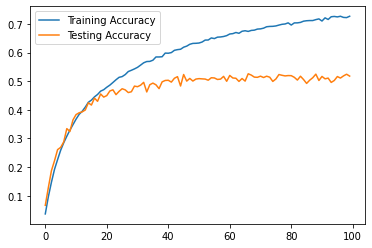

In [ ]:
plt.plot(output.history['acc'])
plt.plot(output.history['val_acc'])
plt.legend(['Training Accuracy','Testing Accuracy'])


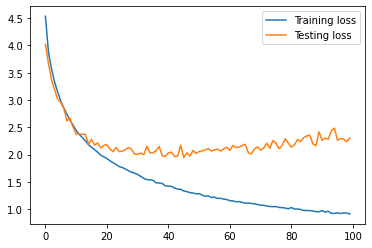

In [ ]:
plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.legend(['Training loss','Testing loss'])

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import datetime as dt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,Add,Activation
from keras import backend as K
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

y_proc=np.zeros((50000,100))
for i in range(0,50000):
    y_proc[i][y_train[i][0]]=1
y_test_proc=np.zeros((10000,100))
for i in range(0,10000):
    y_test_proc[i][y_test[i][0]]=1
y_proc.shape
input_shape=(32,32,3)
y_test_proc[0]
# plt.imshow(x_train[0])
# x_train=x_train.astype('float')/255
# x_test=x_test.astype('float')/255

inputs = keras.Input(shape=input_shape)
x = layers.Conv2D(32, 3, activation='relu')(inputs)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(3)(x)
num_res_net_blocks = 5
filters=32
conv_size=3

x_skip=x
x = layers.Conv2D(32, conv_size, activation='relu', padding='same')(x)

x = layers.Add()([x, x_skip])
# x = layers.MaxPool2D((3,3), strides=(1,1), padding='same')(x)
x = layers.Activation('relu')(x)

x_skip=x
x = layers.Conv2D(filters, conv_size, activation='relu', padding='same')(x)
x = layers.Conv2D(filters, conv_size, activation=None, padding='same')(x)
x = layers.Add()([x, x_skip])
# x = layers.MaxPool2D((3,3), strides=(1,1), padding='same')(x)
x = layers.Activation('relu')(x)


x_skip=x
x = layers.Conv2D(32, conv_size, activation='relu', padding='same')(x)
x = layers.Conv2D(32, conv_size, activation=None, padding='same')(x)
x = layers.Add()([x, x_skip])
# x = layers.MaxPool2D((3,3), strides=(1,1), padding='same')(x)
x = layers.Activation('relu')(x)

x = layers.Conv2D(64, conv_size, activation=None, padding='same')(x)

x_skip=x
x = layers.Conv2D(64, conv_size, activation='relu', padding='same')(x)
x = layers.Conv2D(64, conv_size, activation=None, padding='same')(x)
x = layers.Add()([x, x_skip])
# x = layers.MaxPool2D((3,3), strides=(1,1), padding='same')(x)
x = layers.Activation('relu')(x)

x_skip=x
x = layers.Conv2D(64, conv_size, activation='relu', padding='same')(x)
x = layers.Conv2D(64, conv_size, activation=None, padding='same')(x)
x = layers.Add()([x, x_skip])
# x = layers.MaxPool2D((3,3), strides=(1,1), padding='same')(x)
x = layers.Activation('relu')(x)

x = layers.Conv2D(128, conv_size, activation=None, padding='same')(x)

x_skip=x
x = layers.Conv2D(128, conv_size, activation='relu', padding='same')(x)
x = layers.Conv2D(128, conv_size, activation=None, padding='same')(x)
x = layers.Add()([x, x_skip])
# x = layers.MaxPool2D((3,3), strides=(1,1), padding='same')(x)
x = layers.Activation('relu')(x)

x_skip=x
x = layers.Conv2D(128, conv_size, activation='relu', padding='same')(x)
x = layers.Conv2D(128, conv_size, activation=None, padding='same')(x)
x = layers.Add()([x, x_skip])
# x = layers.MaxPool2D((3,3), strides=(1,1), padding='same')(x)
x = layers.Activation('relu')(x)


x = layers.Conv2D(256, 3, activation='relu')(x)
x = layers.Conv2D(256, 3, activation='relu')(x)
x = layers.AveragePooling2D(4)(x)
x=layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
outputs = layers.Dense(100, activation='softmax')(x)

res_net_model = keras.Model(inputs, outputs)

res_net_model.load_weights('../weights/resnet_adam_noreg.hdf5')


y_pred=res_net_model.predict(x_test)
# tf.one_hot(y_pred)
# y_pred=np.where(y_pred[0]=max(y_pred[0],1,0))
y_pred_proc=np.zeros((10000,100))
for i in range(0,10000):
    y_pred_proc[i][np.argmax(y_pred[i])]=1
print("Precision: "+ str(precision_score(y_test_proc, y_pred_proc, average='weighted')))
print("Recall: "+ str(recall_score(y_test_proc, y_pred_proc, average='weighted')))
print("Accuracy: "+ str(accuracy_score(y_test_proc, y_pred_proc)))

Precision: 0.5429850361603739
Recall: 0.5262
Accuracy: 0.5262
